In [1]:
import re
import nltk
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("Twitter_Sentiment.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229999 entries, 0 to 229998
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  229999 non-null  int64 
 1   text       229999 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.5+ MB


In [6]:
df['sentiment'].unique()

array([0, 1], dtype=int64)

In [7]:
df.dropna(subset=['sentiment','text'], inplace=True)

In [8]:
df['sentiment'].unique()

array([0, 1], dtype=int64)

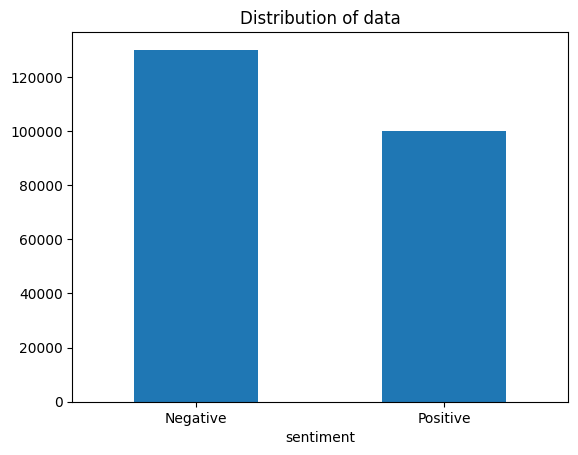

In [9]:
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['sentiment'])

<Axes: xlabel='sentiment', ylabel='count'>

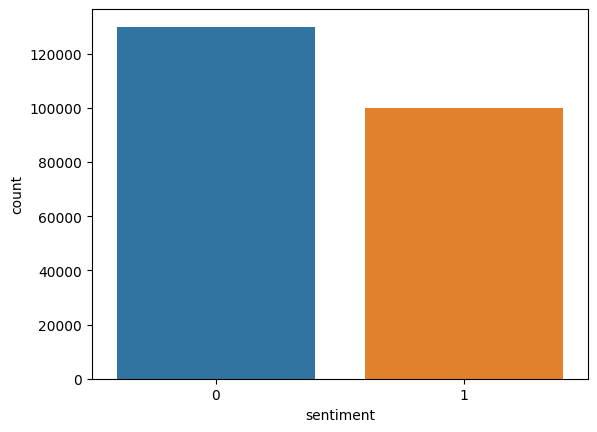

In [10]:
sns.countplot(x='sentiment', data=df)

In [11]:
df[df['sentiment']==0].head(10)

,sentiment,text
0,0,Blue Ridge Bank shares halted by NYSE after #bitcoin ATM announcement https://t.co/xaaZmaJKiV @MyBlueRidgeBankâ€¦ https://t.co/sgBxMkP1SI
1,0,"ðŸ˜Ž Today, that's this #Thursday, we will do a ""ðŸŽ¬ Take 2"" with our friend @LeoWandersleb, #Btc #wallet #security expeâ€¦ https://t.co/go6aDgRml5"
2,0,"Guys evening, I have read this article about BTC and would like to share with you all - https://t.co/QxCZgmuy3Bâ€¦ https://t.co/o6wn7ppkVY"
3,0,$BTC A big chance in a billion! Price: \4872644.0 (2021/02/11 08:51) #Bitcoin #FX #BTC #crypto
4,0,"This network is secured by 9 508 nodes as of today. Soon, the biggest bears will recognise: #BTC in too big to failâ€¦ https://t.co/1XovDA8rKw"
6,0,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #BTC https://t.co/CV9IyODy55
7,0,ðŸ”„ Prices update in $EUR (1 hour):\n\n$BTC - 37082.1 â‚¬ (-0.51 %)\n$ETH - 1441.59 â‚¬ (+0.21 %)\n$XRP - 0.42 â‚¬ (â€¦ https://t.co/y3wlhAv2SX
8,0,"#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotrading \n\n$RSR I know i told you guys the target was $0.060, i know weâ€¦ https://t.co/bvEtSnhs67"
9,0,.@Teslaâ€™s #bitcoin investment is revolutionary for #crypto but other firms may not do the same just yet - @JPMorganâ€¦ https://t.co/WyKWfh0ELw
11,0,ðŸ”„ Prices update in $USDT (1 hour):\n\n$BTC - 44853.08 $ (-0.48 %)\n$ETH - 1740.0 $ (-0.02 %)\n$XRP - 0.5 $â€¦ https://t.co/v5oGvW7kLm


In [12]:
df[df['sentiment']==1].head(10)

,sentiment,text
5,1,ðŸ’¹ Trade #Crypto on #Binance \n\nðŸ“Œ Enjoy #Cashback 10% of the Trading fee\nðŸ“Œ Sign up link ðŸ‘‰ https://t.co/T4WttWeohcâ€¦ https://t.co/Fc7dG5oI8W
10,1,Annnd #btc #Bitcoin is headed even higher now... https://t.co/EHAduI087d
12,1,"Join our first virtual crypto meetup of 2021 - Crypto Fridays!\n\nThere is something for everyone, whether you're anâ€¦ https://t.co/rPINdw6hCc"
21,1,Forget all you know about #cryptocurrency \nThese 6 coins are listed in #NASDAQ ETF!!!\nThese are the real ones withâ€¦ https://t.co/XRyMP0yIcF
34,1,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotrading \n\nWhat $ETH do next will determine where the local top will be.â€¦ https://t.co/CmN3QKGbtF
37,1,Three of my precious gems reached their ATH today!!\n$LINK $28.56\n$DOT $24.76\n$GRT $1.26\n\nThese powerhouses are onlyâ€¦ https://t.co/IaptfqhJxs
40,1,Free #Mailey Advice:\n\nImagine in 2019 there was a #Bitcoin mining company that mined 20000 #BTC qtrly and held themâ€¦ https://t.co/jh9lGKZU3X
47,1,Who want to learn about Forex trading and join a great team? #forex #forexsignals #trading #forextrader #forextradeâ€¦ https://t.co/g1UaA1nkJ1
52,1,"If I was to ask every bitcoin whale for a chance if they would give me 100 bitcoin , I am 100 % positive I would suâ€¦ https://t.co/RWkDekKmOi"
54,1,Market Id : BTC-AUD\nLast Price :58798.83\n24 Hour High :61550\n24 Hour Low :57009.19\nBest Bid :58655.47\nBest Ask : 58798.83\n#btc #bitcoin


In [13]:
df.shape

(229999, 2)

In [14]:
df["sentiment"].value_counts()

sentiment
0    130001
1     99998
Name: count, dtype: int64

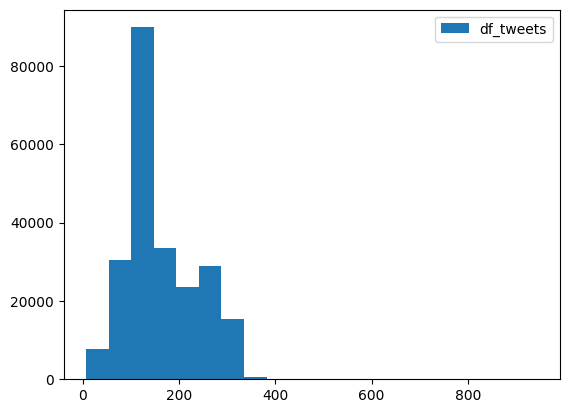

In [15]:
length_df = df['text'].str.len()
plt.hist(length_df,bins=20,label="df_tweets")
plt.legend()
plt.show()

In [16]:
def remove_pattern(input_text, pattern):
  r = re.findall(pattern,input_text)
  for i in r:
    input_text = re.sub(i, '', input_text)
  return input_text

In [17]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))
df['text'].tail()

229994                                                                                            #Bitcoin hashrate plunges as Chinese crypto mining crackdown hits Sichuan - Forkast News https://t.co/VJ1NOJKwh
229995    POKKET interest rate (APY) update Jun 1\n\n1) Simple Savings (Lending):\n\n$BTC 6.25%\n$ETH 6.25%\nwith14, 30, 90 day durations \n\n$LINK 6.00%\nwith 30, 60 day durations \n\n$UOP 2.50%\nwith 30 d...
229996                                                                                                                                                "Bitcoin is its own worst enemy".\n\n#Bitcoin #eth #Cardano
229997                                                                                                 Paraguay may adopt #Bitcoin as lawmaker seeks to follow El Salvador - Forkast News https://t.co/Cq4YricwaB
229998    @pufferswap I Think, this is very strong project\nThanks for shared this wonderful opportunity\nBest wishes for all team members\n\n@ghofuralinse\n@An

In [18]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].tail()

229994                                                                                                                 #Bitcoin hashrate plunges as Chinese crypto mining crackdown hits Sichuan - Forkast News  
229995    POKKET interest rate (APY) update Jun 1\n\n1) Simple Savings (Lending):\n\n$BTC 6.25%\n$ETH 6.25%\nwith14, 30, 90 day durations \n\n$LINK 6.00%\nwith 30, 60 day durations \n\n$UOP 2.50%\nwith 30 d...
229996                                                                                                                                                "Bitcoin is its own worst enemy".\n\n#Bitcoin #eth #Cardano
229997                                                                                                                       Paraguay may adopt #Bitcoin as lawmaker seeks to follow El Salvador - Forkast News  
229998    @pufferswap I Think, this is very strong project\nThanks for shared this wonderful opportunity\nBest wishes for all team members\n\n@ghofuralinse\n@An

Removing Twitter Handles

In [19]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['text'],"@[\w]*")
df.head()

,sentiment,text,clean_tweet
0,0,Blue Ridge Bank shares halted by NYSE after #bitcoin ATM announcement s://t.co/sgBxMk1SI,Blue Ridge Bank shares halted by NYSE after #bitcoin ATM announcement s://t.co/sgBxMk1SI
1,0,"ðŸ˜Ž Today, that's this #Thursday, we will do a ""ðŸŽ¬ Take 2"" with our friend @LeoWandersleb, #Btc #wallet #security expeâ€¦","ðŸ˜Ž Today, that's this #Thursday, we will do a ""ðŸŽ¬ Take 2"" with our friend , #Btc #wallet #security expeâ€¦"
2,0,"Guys evening, I have read this article about BTC and would like to share with you all - s://t.co/o6wn7ppkVY","Guys evening, I have read this article about BTC and would like to share with you all - s://t.co/o6wn7ppkVY"
3,0,$BTC A big chance in a billion! Price: \4872644.0 (201/021 08:1) #Bitcoin #FX #BTC #crypto,$BTC A big chance in a billion! Price: \4872644.0 (201/021 08:1) #Bitcoin #FX #BTC #crypto
4,0,"This network is secured by 9 508 nodes as of today. Soon, the biggest bears will recognise: #BTC in too big to failâ€¦","This network is secured by 9 508 nodes as of today. Soon, the biggest bears will recognise: #BTC in too big to failâ€¦"


Removing Numbers, Punctuations, and Special Characters

In [20]:
df['clean_tweet']= df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head(10)

,sentiment,text,clean_tweet
0,0,Blue Ridge Bank shares halted by NYSE after #bitcoin ATM announcement s://t.co/sgBxMk1SI,Blue Ridge Bank shares halted by NYSE after #bitcoin ATM announcement s://t.co/sgBxMk1SI
1,0,"ðŸ˜Ž Today, that's this #Thursday, we will do a ""ðŸŽ¬ Take 2"" with our friend @LeoWandersleb, #Btc #wallet #security expeâ€¦","ðŸ˜Ž Today, that's this #Thursday, we will do a ""ðŸŽ¬ Take 2"" with our friend , #Btc #wallet #security expeâ€¦"
2,0,"Guys evening, I have read this article about BTC and would like to share with you all - s://t.co/o6wn7ppkVY","Guys evening, I have read this article about BTC and would like to share with you all - s://t.co/o6wn7ppkVY"
3,0,$BTC A big chance in a billion! Price: \4872644.0 (201/021 08:1) #Bitcoin #FX #BTC #crypto,$BTC A big chance in a billion! Price: \4872644.0 (201/021 08:1) #Bitcoin #FX #BTC #crypto
4,0,"This network is secured by 9 508 nodes as of today. Soon, the biggest bears will recognise: #BTC in too big to failâ€¦","This network is secured by 9 508 nodes as of today. Soon, the biggest bears will recognise: #BTC in too big to failâ€¦"
5,1,ðŸ’¹ Trade #Crypto on #Binance \n\nðŸ“Œ Enjoy #Cashback10% of the Trading fee\nðŸ“Œ Sign up link ðŸ‘‰ s://t.co/Fc7dG5oI8W,ðŸ’¹ Trade #Crypto on #Binance \n\nðŸ“Œ Enjoy #Cashback10% of the Trading fee\nðŸ“Œ Sign up link ðŸ‘‰ s://t.co/Fc7dG5oI8W
6,0,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #BTC,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #BTC
7,0,ðŸ”„ Prices update in $EUR 1 hour):\n\n$BTC - 370821 â‚¬ (-0.1 %)\n$ETH -141.59 â‚¬ (+0.1 %)\n$XRP - 0.42 â‚¬ (â€¦,ðŸ”„ Prices update in $EUR 1 hour):\n\n$BTC - 370821 â‚¬ (-0.1 %)\n$ETH -141.59 â‚¬ (+0.1 %)\n$XRP - 0.42 â‚¬ (â€¦
8,0,"#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotrading \n\n$RSR I know i told you guys the target was $0.060, i know weâ€¦ s67","#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotrading \n\n$RSR I know i told you guys the target was $0.060, i know weâ€¦ s67"
9,0,.@Teslaâ€™s #bitcoin investment is revolutionary for #crypto but other firms may not do the same just yet - @JPMorganâ€¦,.€™s #bitcoin investment is revolutionary for #crypto but other firms may not do the same just yet - €¦


Removing Short Words

In [21]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

df.head()

,sentiment,text,clean_tweet
0,0,Blue Ridge Bank shares halted by NYSE after #bitcoin ATM announcement s://t.co/sgBxMk1SI,Blue Ridge Bank shares halted NYSE after #bitcoin announcement s://t.co/sgBxMk1SI
1,0,"ðŸ˜Ž Today, that's this #Thursday, we will do a ""ðŸŽ¬ Take 2"" with our friend @LeoWandersleb, #Btc #wallet #security expeâ€¦","ðŸ˜Ž Today, that's this #Thursday, will ""ðŸŽ¬ Take with friend #Btc #wallet #security expeâ€¦"
2,0,"Guys evening, I have read this article about BTC and would like to share with you all - s://t.co/o6wn7ppkVY","Guys evening, have read this article about would like share with s://t.co/o6wn7ppkVY"
3,0,$BTC A big chance in a billion! Price: \4872644.0 (201/021 08:1) #Bitcoin #FX #BTC #crypto,$BTC chance billion! Price: \4872644.0 (201/021 08:1) #Bitcoin #BTC #crypto
4,0,"This network is secured by 9 508 nodes as of today. Soon, the biggest bears will recognise: #BTC in too big to failâ€¦","This network secured nodes today. Soon, biggest bears will recognise: #BTC failâ€¦"


Normalising Text

In [22]:
tokenized_tweet = df['clean_tweet'].apply(lambda x:x.split())

tokenized_tweet.head()

0                    [Blue, Ridge, Bank, shares, halted, NYSE, after, #bitcoin, announcement, s://t.co/sgBxMk1SI]
1    [ðŸ˜Ž, Today,, that's, this, #Thursday,, will, "ðŸŽ¬, Take, with, friend, #Btc, #wallet, #security, expeâ€¦]
2               [Guys, evening,, have, read, this, article, about, would, like, share, with, s://t.co/o6wn7ppkVY]
3                          [$BTC, chance, billion!, Price:, \4872644.0, (201/021, 08:1), #Bitcoin, #BTC, #crypto]
4                 [This, network, secured, nodes, today., Soon,, biggest, bears, will, recognise:, #BTC, failâ€¦]
Name: clean_tweet, dtype: object

In [23]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x : [stemmer.stem(i) for i in x])

In [24]:
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
df['clean_tweet'] = tokenized_tweet

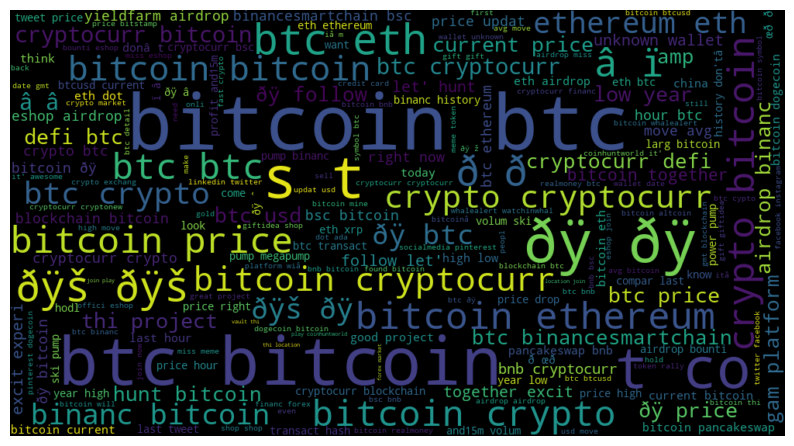

In [25]:
all_words = ' '.join([text for text in df['clean_tweet']])
from wordcloud import WordCloud
words = WordCloud(width = 1000, height = 550, random_state=22, max_font_size = 100 ).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(words, interpolation = 'bilinear')
plt.axis('off')
plt.show()

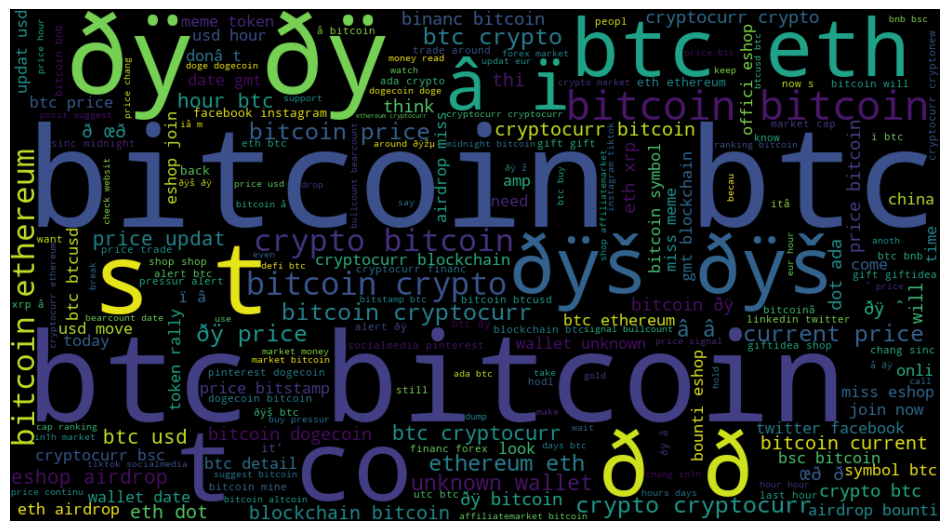

In [26]:
normal_words = ' '.join([text for text in df['clean_tweet'][df['sentiment']==0]])
words = WordCloud(width = 1000, height =550, random_state = 22, max_font_size = 150).generate(normal_words)
plt.figure(figsize=(12,9))
plt.imshow(words, interpolation = 'bilinear')
plt.axis('off')
plt.show()

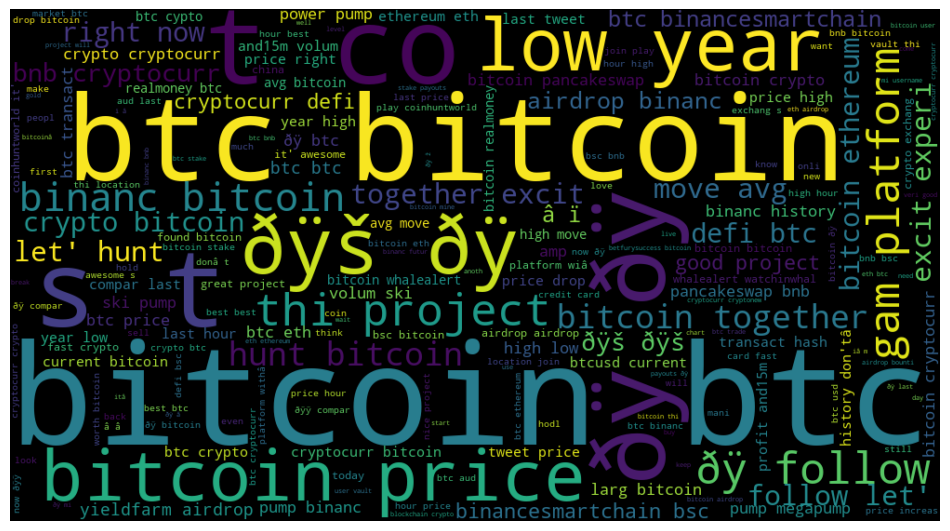

In [27]:
negative_words = ' '.join([text for text in df['clean_tweet'][df['sentiment']==1]])
words = WordCloud(width =1000, height = 550, random_state = 21, max_font_size = 150).generate(negative_words)
plt.figure(figsize=(12,9))
plt.imshow(words, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [28]:
def hashtag_extract(x):
  hashtags = []
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)
  return hashtags

In [29]:
HT_positive = hashtag_extract(df['clean_tweet'][df['sentiment']==0])
HT_negative = hashtag_extract(df['clean_tweet'][df['sentiment']==1])

HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

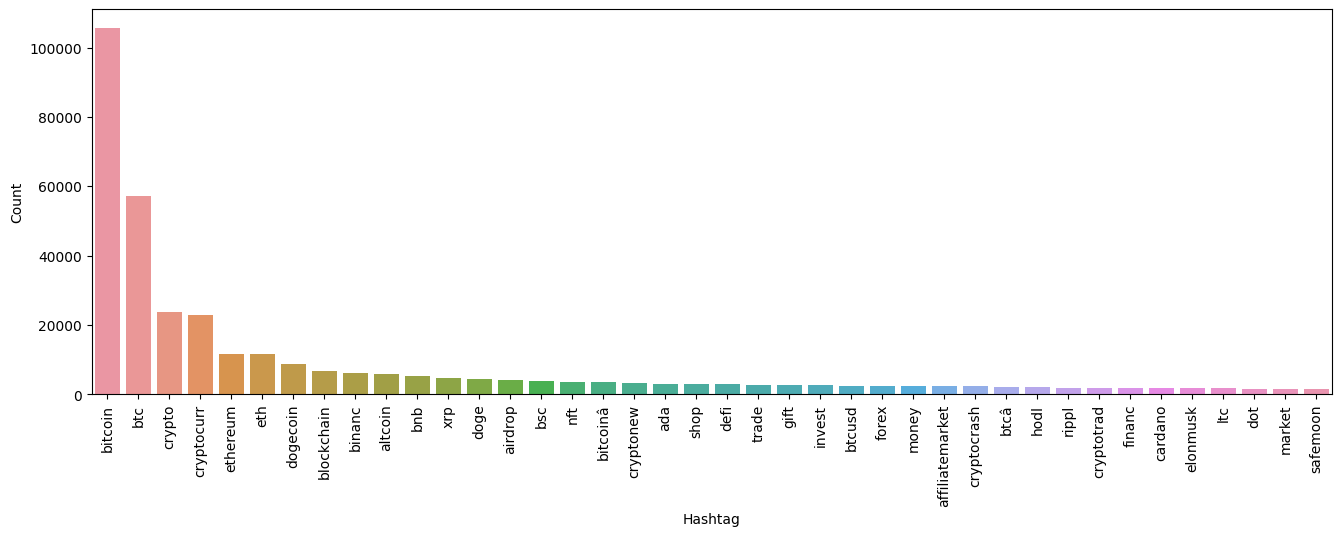

In [30]:
a =  nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag':list(a.keys()),'Count': list(a.values())})

d = d.nlargest(columns = "Count", n = 40)
plt.figure(figsize=(16,5), dpi =200)
ax = sns.barplot(data = d, x = "Positive Hashtags", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation = 90)
plt.show()


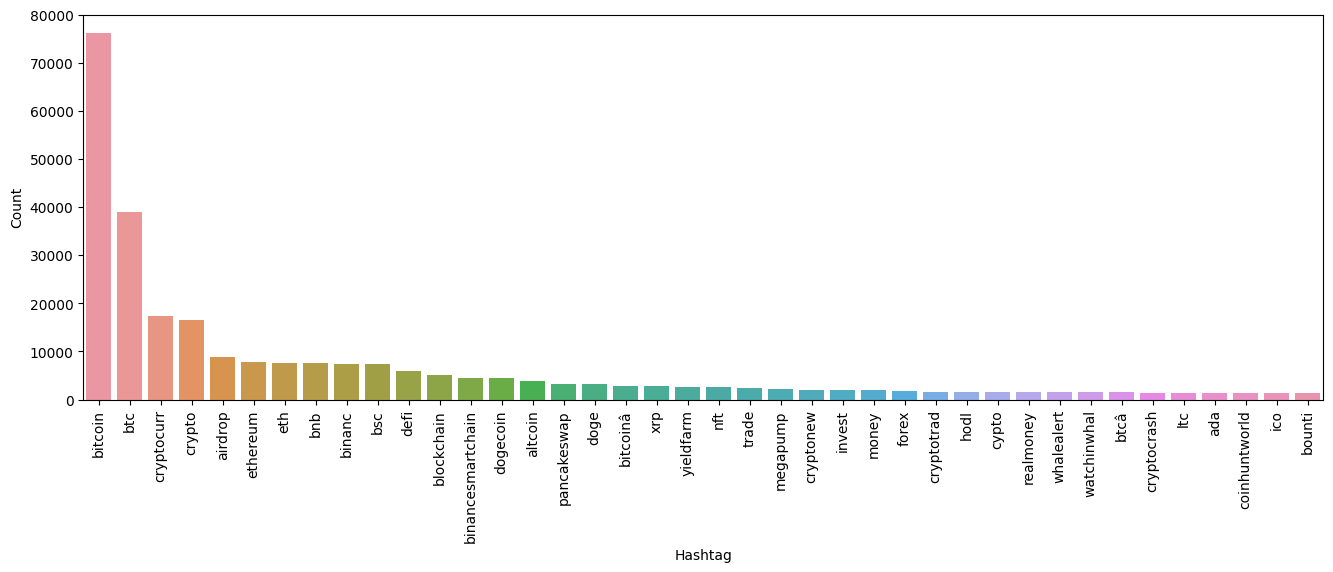

In [31]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

e = e.nlargest(columns = "Count", n = 40)
plt.figure(figsize=(16,5), dpi= 200)
plt.xticks(rotation = 90)
ax = sns.barplot(data=e, x ="Negative Hashtags", y = "Count")

In [32]:
y = df['sentiment']
X = df['clean_tweet']

In [33]:
# Separating the 95% data for training data and 5% for testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26105111)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [36]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
def model_Evaluate(model):
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [40]:
Log_model = LogisticRegression()

In [41]:
pipe = Pipeline(steps=[('logistic_Reg', Log_model)])

In [42]:
C = np.array([7.26,7.27,7.28,7.29,7.30,7.31,7.32,7.33,7.34,7.35])
penalty = ['l1', 'l2']
n_iter = [30, 50, 100]

parameters = dict(logistic_Reg__C=C,logistic_Reg__penalty=penalty)

In [43]:
Grid_CV = GridSearchCV(pipe, parameters)
Grid_CV.fit(X_train, y_train)

c:\Users\avani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\avani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(estimator=Pipeline(steps=[('logistic_Reg', LogisticRegression())]),
             param_grid={'logistic_Reg__C': array([7.26, 7.27, 7.28, 7.29, 7.3 , 7.31, 7.32, 7.33, 7.34, 7.35]),
                         'logistic_Reg__penalty': ['l1', 'l2']})

In [45]:
C_best = Grid_CV.best_estimator_.get_params()['logistic_Reg__C']
Penalty_best = Grid_CV.best_estimator_.get_params()['logistic_Reg__penalty']
print('Best Penalty:', Grid_CV.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', Grid_CV.best_estimator_.get_params()['logistic_Reg__C'])

Best Penalty: l2
Best C: 7.33


              precision    recall  f1-score   support

           0       0.93      0.96      0.95     25887
           1       0.95      0.91      0.93     20113

    accuracy                           0.94     46000
   macro avg       0.94      0.94      0.94     46000
weighted avg       0.94      0.94      0.94     46000



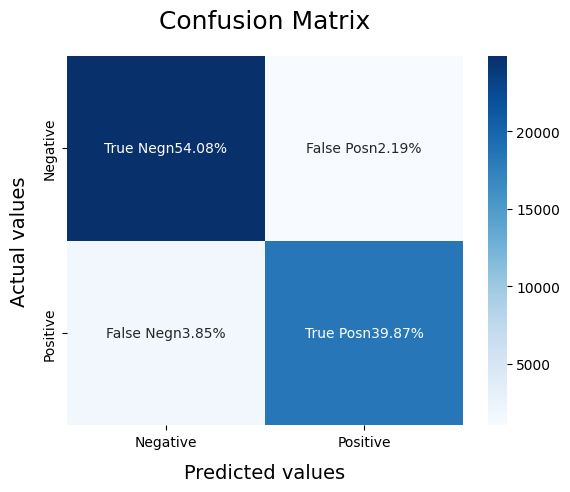

In [50]:
Log_model = LogisticRegression(C = 7.33, max_iter = 100000, penalty= Penalty_best)
Log_model.fit(X_train, y_train)
model_Evaluate(Log_model)
y_pred = Log_model.predict(X_test)

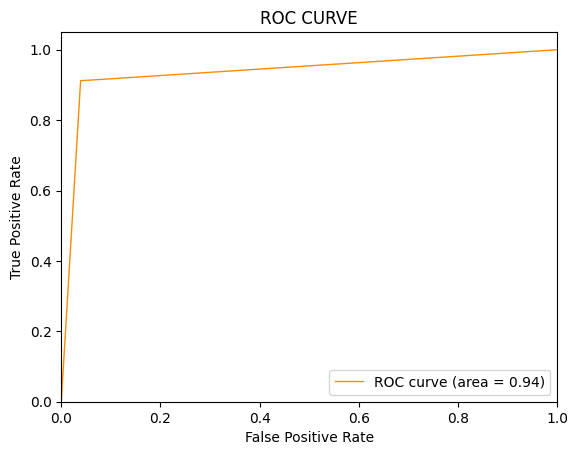

In [47]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()